In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time

In [2]:
#Reading the clean data file
df = pd.read_csv("Resources/airlines_ML_clean_df.csv")
df.head()

,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,ARRIVAL_DELAY
0,1,4,AS,ANC,SEA,5,-22.0
1,1,4,AA,LAX,PBI,10,-9.0
2,1,4,US,SFO,CLT,20,5.0
3,1,4,AA,LAX,MIA,20,-9.0
4,1,4,AS,SEA,ANC,25,-21.0


In [3]:
#formating the scheduled departure to convert it to hourly basis
df['SCHEDULED_DEPARTURE'] = df['SCHEDULED_DEPARTURE'].apply(lambda x:int(str(x)[:2]) if x>999 else int(str(x)[:1] if x>99 else 0))

#Setting Delay column based values on arrival delay
df['DELAY_YN'] = df['ARRIVAL_DELAY'].apply(lambda x:1 if x>0 else 0)

#Drop rows with Null Values
df.dropna(inplace=True)
df.head()

,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,ARRIVAL_DELAY,DELAY_YN
0,1,4,AS,ANC,SEA,0,-22.0,0
1,1,4,AA,LAX,PBI,0,-9.0,0
2,1,4,US,SFO,CLT,0,5.0,1
3,1,4,AA,LAX,MIA,0,-9.0,0
4,1,4,AS,SEA,ANC,0,-21.0,0


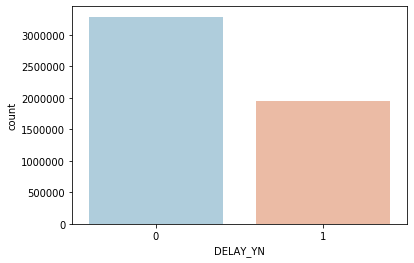

In [4]:
#check data for delays vs no delay 
import seaborn as sns
sns.countplot(x='DELAY_YN', data=df,palette='RdBu_r')

In [5]:
#Convert Categorical Variables into Dummy Variables
tic = time.time()
df = pd.concat([df,pd.get_dummies(df['MONTH'],prefix="MONTH")],axis=1)
df = pd.concat([df,pd.get_dummies(df['DAY_OF_WEEK'],prefix="DAY_OF_WEEK")],axis=1)
df = pd.concat([df,pd.get_dummies(df['AIRLINE'],prefix="AIRLINE")],axis=1)
df = pd.concat([df,pd.get_dummies(df['ORIGIN_AIRPORT'],prefix="ORIGIN")],axis=1)
df = pd.concat([df,pd.get_dummies(df['DESTINATION_AIRPORT'],prefix="DEST")],axis=1)
df = pd.concat([df,pd.get_dummies(df['SCHEDULED_DEPARTURE'],prefix="DEP_HOUR")],axis=1)
toc = time.time()
print("Time to convert to dummy variables : " + str(toc-tic) + " seconds")

Time to convert to dummy variables : 82.32985496520996 seconds


In [6]:
#Drop the original Categorical Variables
df.drop(['MONTH','DAY_OF_WEEK','AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','SCHEDULED_DEPARTURE'],axis=1,inplace=True)

In [7]:
#split the data for train (70%) and test (30%)
from sklearn.model_selection import train_test_split
tic = time.time()

X_train, X_test, y_train, y_test = train_test_split(df.drop(['DELAY_YN','ARRIVAL_DELAY'],axis=1), 
                                                    df['DELAY_YN'], test_size=0.30, random_state=42)

toc = time.time()
print("Data Split time : " + str(toc-tic) + " seconds")

Data Split time : 36.57720494270325 seconds


In [8]:
from sklearn.linear_model import LogisticRegression

#Train the model
tic = time.time()
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
toc = time.time()
print("Finished training/fit the model in : " + str(toc-tic) + " seconds")

C:\Users\bbcho\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Finished training/fit the model in : 608.176168680191 seconds


In [9]:
#Predicting on the Test Set
tic = time.time()
predictions = logmodel.predict(X_test)
toc = time.time()
print("Finished predict the model in : " + str(toc-tic) + " seconds")

Finished predict the model in : 16.770344734191895 seconds


In [10]:
#Model Evaluation

from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

tic = time.time()
truePos = X_test[((predictions == 1) & (y_test == predictions))]
falsePos = X_test[((predictions == 1) & (y_test != predictions))]
trueNeg = X_test[((predictions == 0) & (y_test == predictions))]
falseNeg = X_test[((predictions == 0) & (y_test != predictions))]

TP = truePos.shape[0]
FP = falsePos.shape[0]
TN = trueNeg.shape[0]
FN = falseNeg.shape[0]

accuracy = float(TP + TN)/float(TP + TN + FP + FN)
print('Accuracy: '+str(accuracy))
toc = time.time()
print("Finished evaluating the model in : " + str(toc-tic) + " seconds")

              precision    recall  f1-score   support

           0       0.65      0.93      0.76    985423
           1       0.54      0.15      0.23    583916

    accuracy                           0.64   1569339
   macro avg       0.60      0.54      0.50   1569339
weighted avg       0.61      0.64      0.57   1569339

Accuracy: 0.6369178361080684
Finished evaluating the model in : 4.7326579093933105 seconds


In [11]:
#save the model
from sklearn.externals import joblib
joblib.dump(logmodel, 'Model/Airline_Delay_Predictition_model.pkl') 

C:\Users\bbcho\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Model/Airline_Delay_Predictition_model.pkl']

In [12]:
#checking the df used to create the model
df.head()

,ARRIVAL_DELAY,DELAY_YN,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,...,DEP_HOUR_14,DEP_HOUR_15,DEP_HOUR_16,DEP_HOUR_17,DEP_HOUR_18,DEP_HOUR_19,DEP_HOUR_20,DEP_HOUR_21,DEP_HOUR_22,DEP_HOUR_23
0,-22.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-9.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-9.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-21.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#creating another df for user input to use in the model
user_df=df

In [14]:
user_df.head()

,ARRIVAL_DELAY,DELAY_YN,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,...,DEP_HOUR_14,DEP_HOUR_15,DEP_HOUR_16,DEP_HOUR_17,DEP_HOUR_18,DEP_HOUR_19,DEP_HOUR_20,DEP_HOUR_21,DEP_HOUR_22,DEP_HOUR_23
0,-22.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-9.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-9.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-21.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#remove all the data except the header/columns to create the format
user_df.drop(df.index, inplace=True)
user_df

,ARRIVAL_DELAY,DELAY_YN,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,...,DEP_HOUR_14,DEP_HOUR_15,DEP_HOUR_16,DEP_HOUR_17,DEP_HOUR_18,DEP_HOUR_19,DEP_HOUR_20,DEP_HOUR_21,DEP_HOUR_22,DEP_HOUR_23


In [16]:
#checking the number of columns
user_df_len = len(user_df.columns)
user_df_len

702

In [17]:
#creating default row with 0s as default df
ZEROS = np.zeros((1,user_df_len), dtype=np.int)
user_df = pd.DataFrame(ZEROS, columns = user_df.columns)
user_df

,ARRIVAL_DELAY,DELAY_YN,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,...,DEP_HOUR_14,DEP_HOUR_15,DEP_HOUR_16,DEP_HOUR_17,DEP_HOUR_18,DEP_HOUR_19,DEP_HOUR_20,DEP_HOUR_21,DEP_HOUR_22,DEP_HOUR_23
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#saving the user df to csv file
user_df.to_csv("Resources/user_input_df.csv", index=False)